# Data Analysis and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
fireDF = pd.read_csv('fires.csv')
fireDF.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
fireDF.shape

(517, 13)

# Attribute information 

1. **`X`** - (X-coordinate of the fire in the park: 1 to 9)
2. **`Y`** - (Y-coordinate of the fire in the park: 2 to 9)
3. **`month`** - month: ”jan“ to ”dec“)
4. **`day`** - (day: ”mon“ bis ”sun“)
5. `FFMC` - (FFMC index of the FWI system: 18.7 to 96.2)
6. `DMC` - (DMC index of the FWI system: 1.1 bis 291.3)
7. `DC` - (DC index of the system: 7.9 bis 860.6)
8. `ISI` - (ISI index of the FWI systems: 0.0 to 56.1)
9. **`temp`** - (temperature in degrees Celsius: 2.2 to 33.3)
10. **`RH`** - (relative humidity in %: 15 to 100)
11. **`wind`** -  (wind velocity in km/h: 0.4 to 9.4)
12. **`rain`** - (rainfall in mm/m2: 0.0 to 6.4)
13. **`area`** - (forest area that has been burnt in hectare: 0.09 to 1090.84)

In [19]:
fireDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


- We have no null values in our data set. <br>
- month and day have object datatype, which we have to care of.


In [20]:
fireDF.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Further data exploration

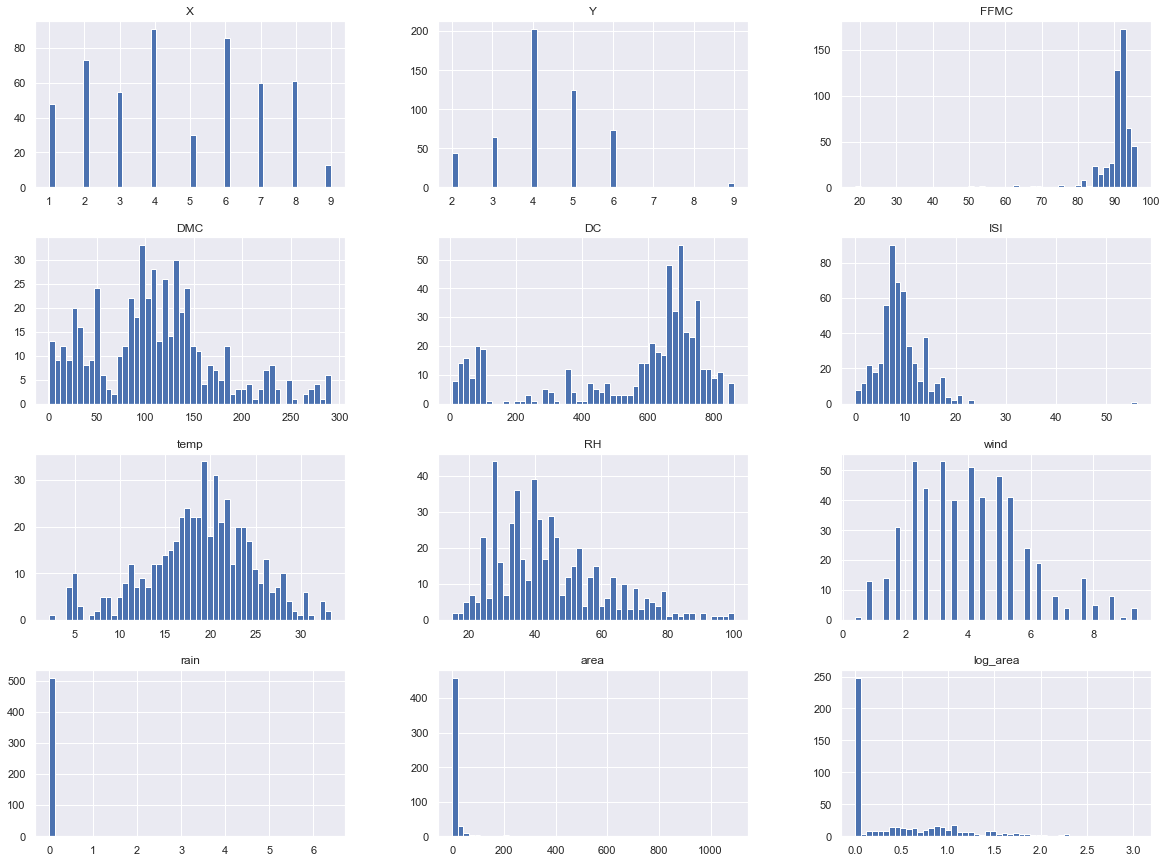

In [78]:
fireDF.hist(bins=50,figsize=(20,15))
plt.show()

Area is our target attribute and it is skewed towards 0. Adding a new attribute by taking log of area.<br> And its skewness dropped from 12.8 to 1.2

In [6]:
fireDF['log_area'] = np.log(fireDF['area']+1)

In [228]:
print(fireDF.area.skew())
fireDF.log_area.skew()


12.846933533934868


1.2178376559535011

(array([251.,  16.,  16.,  29.,  24.,  20.,  23.,  31.,  27.,  12.,  10.,
         10.,  13.,   9.,   8.,   5.,   4.,   0.,   5.,   1.,   1.,   0.,
          0.,   1.,   1.]),
 array([0.        , 0.27982479, 0.55964957, 0.83947436, 1.11929914,
        1.39912393, 1.67894871, 1.9587735 , 2.23859828, 2.51842307,
        2.79824785, 3.07807264, 3.35789742, 3.63772221, 3.91754699,
        4.19737178, 4.47719656, 4.75702135, 5.03684613, 5.31667092,
        5.5964957 , 5.87632049, 6.15614527, 6.43597006, 6.71579484,
        6.99561963]),
 <BarContainer object of 25 artists>)

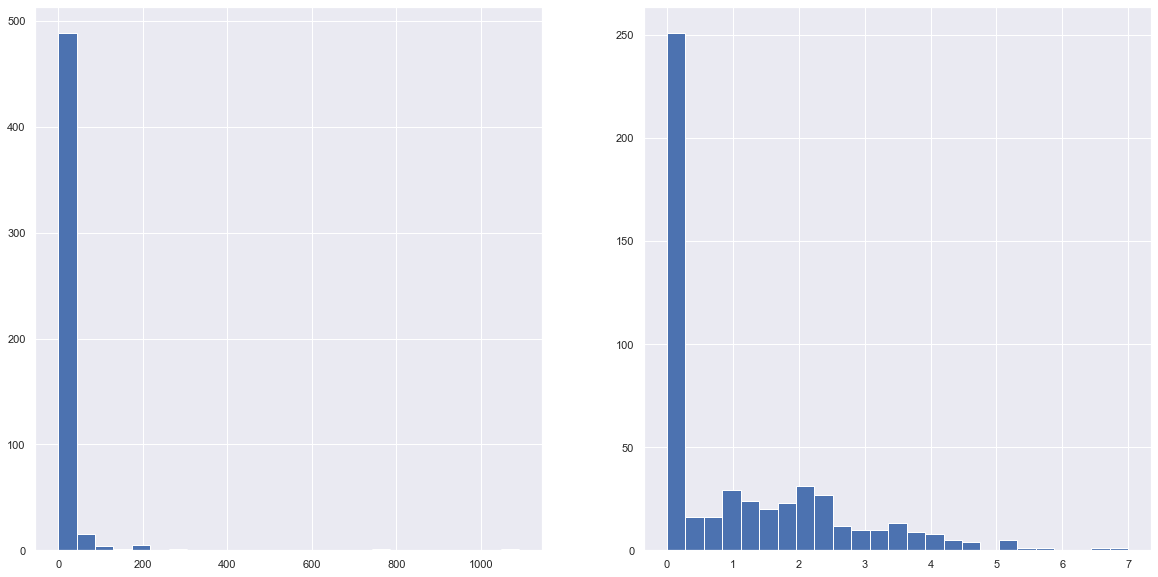

In [247]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].hist(fireDF['area'],bins = 25)
axs[1].hist(fireDF['log_area'], bins = 25)


#### categorical data exploration
we have month and day as categorical data, lets explore them

<AxesSubplot:xlabel='day', ylabel='Count'>

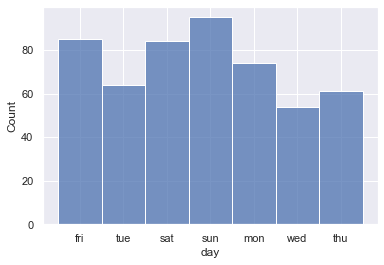

In [102]:
sns.histplot(data= fireDF['day'])

<AxesSubplot:xlabel='month', ylabel='Count'>

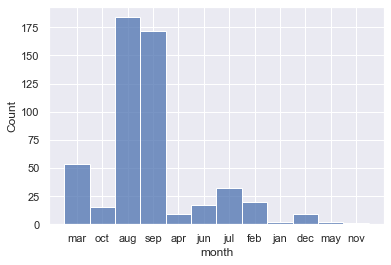

In [101]:
sns.histplot(data= fireDF['month'])

 - August and September have almost half entries in datatset. One solution could be upscaling data.


#### Looking for outliers

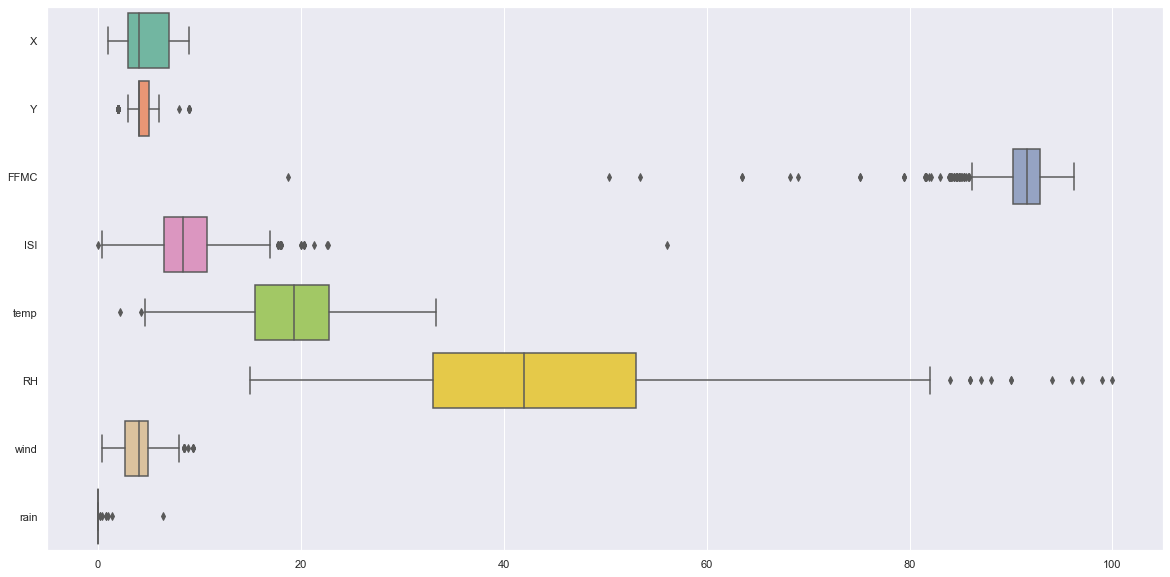

In [137]:
att = ['X', 'Y', 'month', 'day', 'FFMC', 'ISI', 'temp', 'RH',
       'wind', 'rain']
ax = sns.boxplot(data=fireDF[att], orient="h", palette="Set2")

- Many outliers can be observed from the boxplot. <br>
- As outliers has no effect on random forest and other tree based algorithms. I am leaving them without any treatment. <br>
- I have tested by removing outliers and didn't see any significant improvement in any model except little bit in SVR.

In [632]:

#Removing outleirs of column "Y".
for index,row in d.iterrows():
    if (row["Y"]>6) or (row["Y"]<3) :
        d=d.drop(index)
        
#Removing outleirs of column "FFMC".
for index,row in d.iterrows():
    if (row["FFMC"]>96) or (row["FFMC"]<88) :
        d=d.drop(index)
        
#Removing outleirs of column "DMC".
for index,row in d.iterrows():
    if (row["DMC"]>215) or (row["DMC"]<5) :
        d=d.drop(index)
        
#Removing outleirs of column "DC".
for index,row in d.iterrows():
    if (row["DC"]>800) or (row["DC"]<450) :
        d=d.drop(index)
        
#Removing outleirs of column "ISI".
for index,row in d.iterrows():
    if (row["ISI"]>15.5) or (row["ISI"]<0) :
        d=d.drop(index)
        
#Removing outleirs of column "temp".
for index,row in d.iterrows():
    if (row["temp"]>30) or (row["temp"]<12) :
        d=d.drop(index)
        
#After seeing so many outliers in column "rain", dropping "rain".
d.drop(["rain"],axis=1,inplace=True)


In [229]:
fireDF.corr()['area'].sort_values(ascending=False)

area        1.000000
log_area    0.524134
temp        0.097844
DMC         0.072994
X           0.063385
DC          0.049383
Y           0.044873
FFMC        0.040122
wind        0.012317
ISI         0.008258
rain       -0.007366
RH         -0.075519
Name: area, dtype: float64

# Preprocessing

In [156]:
# upscaling data
d = fireDF.drop('area',axis=1)
#d = fireDF[fireDF['area']>0].copy()
#d = d.drop('area',axis=1)
print(d.shape)
for m in d['month'].unique():
    if((m!='aug')&(m!='sep')):
        temp = d[d['month']==m].sample(100, replace=True)
        d = pd.concat([d, temp], axis=0)

print(d.shape)

(517, 13)
(1517, 13)


<BarContainer object of 12 artists>

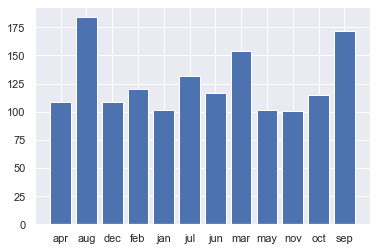

In [42]:
# plot of month data after upscaling

t = d.groupby(['month'])['month'].count()
plt.bar(t.index, t)

### Splitting data into training and testing

In [157]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(d, test_size=0.2, shuffle = True)
work_set = train_set.copy()

fires = work_set.drop('log_area', axis=1)
fires_labels = work_set['log_area'].copy()

### Binarizing 'month' and 'day' columns and scaling data

In [158]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
#Converting day and week entries into '0' and '1's
month_encoder = LabelBinarizer()
day_encoder = LabelBinarizer()

months = fires['month']
days = fires['day']

month_1hot = month_encoder.fit_transform(months)
day_1hot = day_encoder.fit_transform(days)
# scaling numerical feautures
scaler = StandardScaler()

numerical_features = fires.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [159]:
scaled_features

array([[-1.45670346, -0.27996782,  0.61849885, ...,  0.84302757,
        -0.13663337, -0.05192078],
       [-0.49034781, -1.10026002,  0.5012488 , ...,  0.09935778,
        -0.79552376, -0.05192078],
       [ 0.95918565, -0.27996782,  0.31071747, ...,  0.5641514 ,
         0.5729409 , -0.05192078],
       ...,
       [-1.45670346, -0.27996782, -0.26820466, ...,  1.40077991,
        -0.59278826, -0.05192078],
       [ 0.47600783, -1.10026002,  0.62582698, ..., -1.10910563,
        -0.33936887, -0.05192078],
       [-1.93988128, -0.27996782,  0.42063939, ..., -0.59783265,
        -1.04894315, -0.05192078]])

### Creating a pipeline for preprocessing of data
It includes binarizing, scaling and combining numerical and categorical attributes after preprocessing them.

In [160]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [161]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_attributes = ['month', 'day']
categorical_classes = np.concatenate((fires['month'].unique(), fires['day'].unique()), axis=0)

numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])


# combining numerical and categorical data after scaling
full_pipeline = FeatureUnion(transformer_list= [
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
])

In [163]:
fires_prepared = full_pipeline.fit_transform(fires)

In [164]:
#Scaling testing data as well
test_X = test_set.drop('log_area',axis=1)
test_Y = test_set['log_area']
test_X_prepared = full_pipeline.fit_transform(test_X)

# Model training

In [129]:
testing_result = pd.DataFrame()
testing_result['test_Y'] = test_Y

## Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(fires_prepared, fires_labels)

LinearRegression()

In [131]:
some_data = fires.iloc[:5]
some_labels = fires_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_predictions = lr_model.predict(some_data_prepared)

print(some_predictions)
print(list(some_labels))

[2.12341799 1.95864923 3.94898748 1.38522183 3.02157929]
[2.7523860149222616, 2.199444334074532, 3.675794214565281, 0.8020015854720274, 2.3767644911682972]


In [132]:
from sklearn.metrics import mean_squared_error

fires_predictions = lr_model.predict(test_X_prepared)
lr_mse = mean_squared_error(test_Y, fires_predictions)
lr_rmse = np.sqrt(lr_mse)
testing_result['reg']= fires_predictions

print(lr_rmse)

0.8765692821185747


## Decision Tree Regressor

In [133]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(fires_prepared, fires_labels)

DecisionTreeRegressor()

In [134]:


fires_predictions = dtr_model.predict(test_X_prepared)
lr_mse = mean_squared_error(test_Y, fires_predictions)
testing_result['dec_tree']= fires_predictions

In [137]:
# cross validation score
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(dtr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = np.sqrt(-dtr_scores)

lr_scores = cross_val_score(lr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = np.sqrt(-lr_scores)

In [139]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())
print('Decision Tree:')
display_scores(dtr_rmse_scores)


Decision Tree:
Scores:  [0.86433893 0.81003178 1.03654055 0.98959471 0.91242229 0.83689629
 0.97465574 0.7902258  0.51095619 0.99366314]
Mean:  0.8719325414139364
Standard Deviation:  0.14492992155487006


## Random Forest Regressor

In [140]:

from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(fires_prepared, fires_labels)
rfr_predictions = rfr_model.predict(test_X_prepared)
rfr_scores = cross_val_score(rfr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)
display_scores(rfr_rmse_scores)

Scores:  [0.59974204 0.60697284 0.50441243 0.55179758 0.71028174 0.69128037
 0.56586742 0.66977759 0.54244647 0.54464151]
Mean:  0.5987219977226597
Standard Deviation:  0.06663174664736413


### Hyper parameter optimization for Random Forest regressor


In [141]:
from sklearn.model_selection import GridSearchCV

grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_rfr_model = RandomForestRegressor()
grid_search = GridSearchCV(grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(fires_prepared, fires_labels)
print('Best: ',  np.sqrt(-grid_search.best_score_), grid_search.best_params_)

Best:  0.5886094937155024 {'max_features': 6, 'n_estimators': 30}


- Random forest performed best after upscaling.

In [142]:
fires_predictions = rfr_model.predict(test_X_prepared)
testing_result['rfr']= fires_predictions

## Stochastic Gradient Descent Regressor

In [143]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_model.fit(fires_prepared, fires_labels)
sgd_scores = cross_val_score(sgd_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)

display_scores(sgd_rmse_scores)

Scores:  [0.80489028 0.88002276 0.87435267 0.87029962 1.11827707 0.94511014
 0.78892504 1.00786207 0.81084665 0.93984368]
Mean:  0.9040429987371651
Standard Deviation:  0.09695818904553337


In [144]:
fires_predictions = sgd_model.predict(test_X_prepared)
testing_result['sgd']= fires_predictions

### Hyper parameter optimization for SGD regressor


In [145]:
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'alpha': np.random.uniform(0, 0.001, 5),
    'epsilon': np.random.uniform(0, 0.1, 5),
    'l1_ratio': np.random.uniform(0, 0.1, 5),
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
random_sgd_model = SGDRegressor()
random_sgd_search = RandomizedSearchCV(random_sgd_model, n_iter=100, cv=10, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_sgd_search.fit(fires_prepared, fires_labels)

print('Best: ', np.sqrt(-random_sgd_search.best_score_), random_sgd_search.best_params_)

Best:  0.9073098453374479 {'loss': 'squared_loss', 'learning_rate': 'invscaling', 'l1_ratio': 0.019714852339568403, 'epsilon': 0.034940558261497626, 'alpha': 0.0005251219928387301}


- Before upscaling of data, SGD Regressor was best scorer among all models with 1.41 score. <br> 
- After upscaling, other models (SVR and Random Forest regressor) got better results.

## Support Vector Regressor

In [146]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1, gamma='auto')
svr.fit(fires_prepared, fires_labels)
svr_scores = cross_val_score(svr, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)

display_scores(svr_rmse_scores)

Scores:  [0.76637902 0.88774829 0.77269495 0.81964344 1.08223367 0.94388119
 0.73392148 0.94359768 0.69860206 0.76505104]
Mean:  0.8413752817818928
Standard Deviation:  0.11388138711026476


### Hyper parameter optimization for Support Vector Regressor


In [147]:
random_params = {
    'C': np.random.uniform(0.5, 1.5, 5),
    'epsilon': np.random.uniform(0, 0.2, 5),
    'degree': [2, 3, 4, 5, 6],
}
random_svr_model = SVR()
random_svr_search = RandomizedSearchCV(random_svr_model, n_iter=50, cv=10, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_svr_search.fit(fires_prepared, fires_labels)

print('Best: ', np.sqrt(-random_svr_search.best_score_), random_svr_search.best_params_)


Best:  0.7012958633346 {'epsilon': 0.13139446752540324, 'degree': 3, 'C': 1.4963977877935828}


In [149]:
fires_predictions = svr.predict(test_X_prepared)
testing_result['svr']= fires_predictions

plotting_area_g_0 = testing_result.copy()
#plotting_no_up = testing_result.copy()
#plotting_with_up = testing_result.copy()


## Plotting models behaviour on normal data and upscaled data

Text(0.5, 1.0, 'Support Vector (upscaling)')

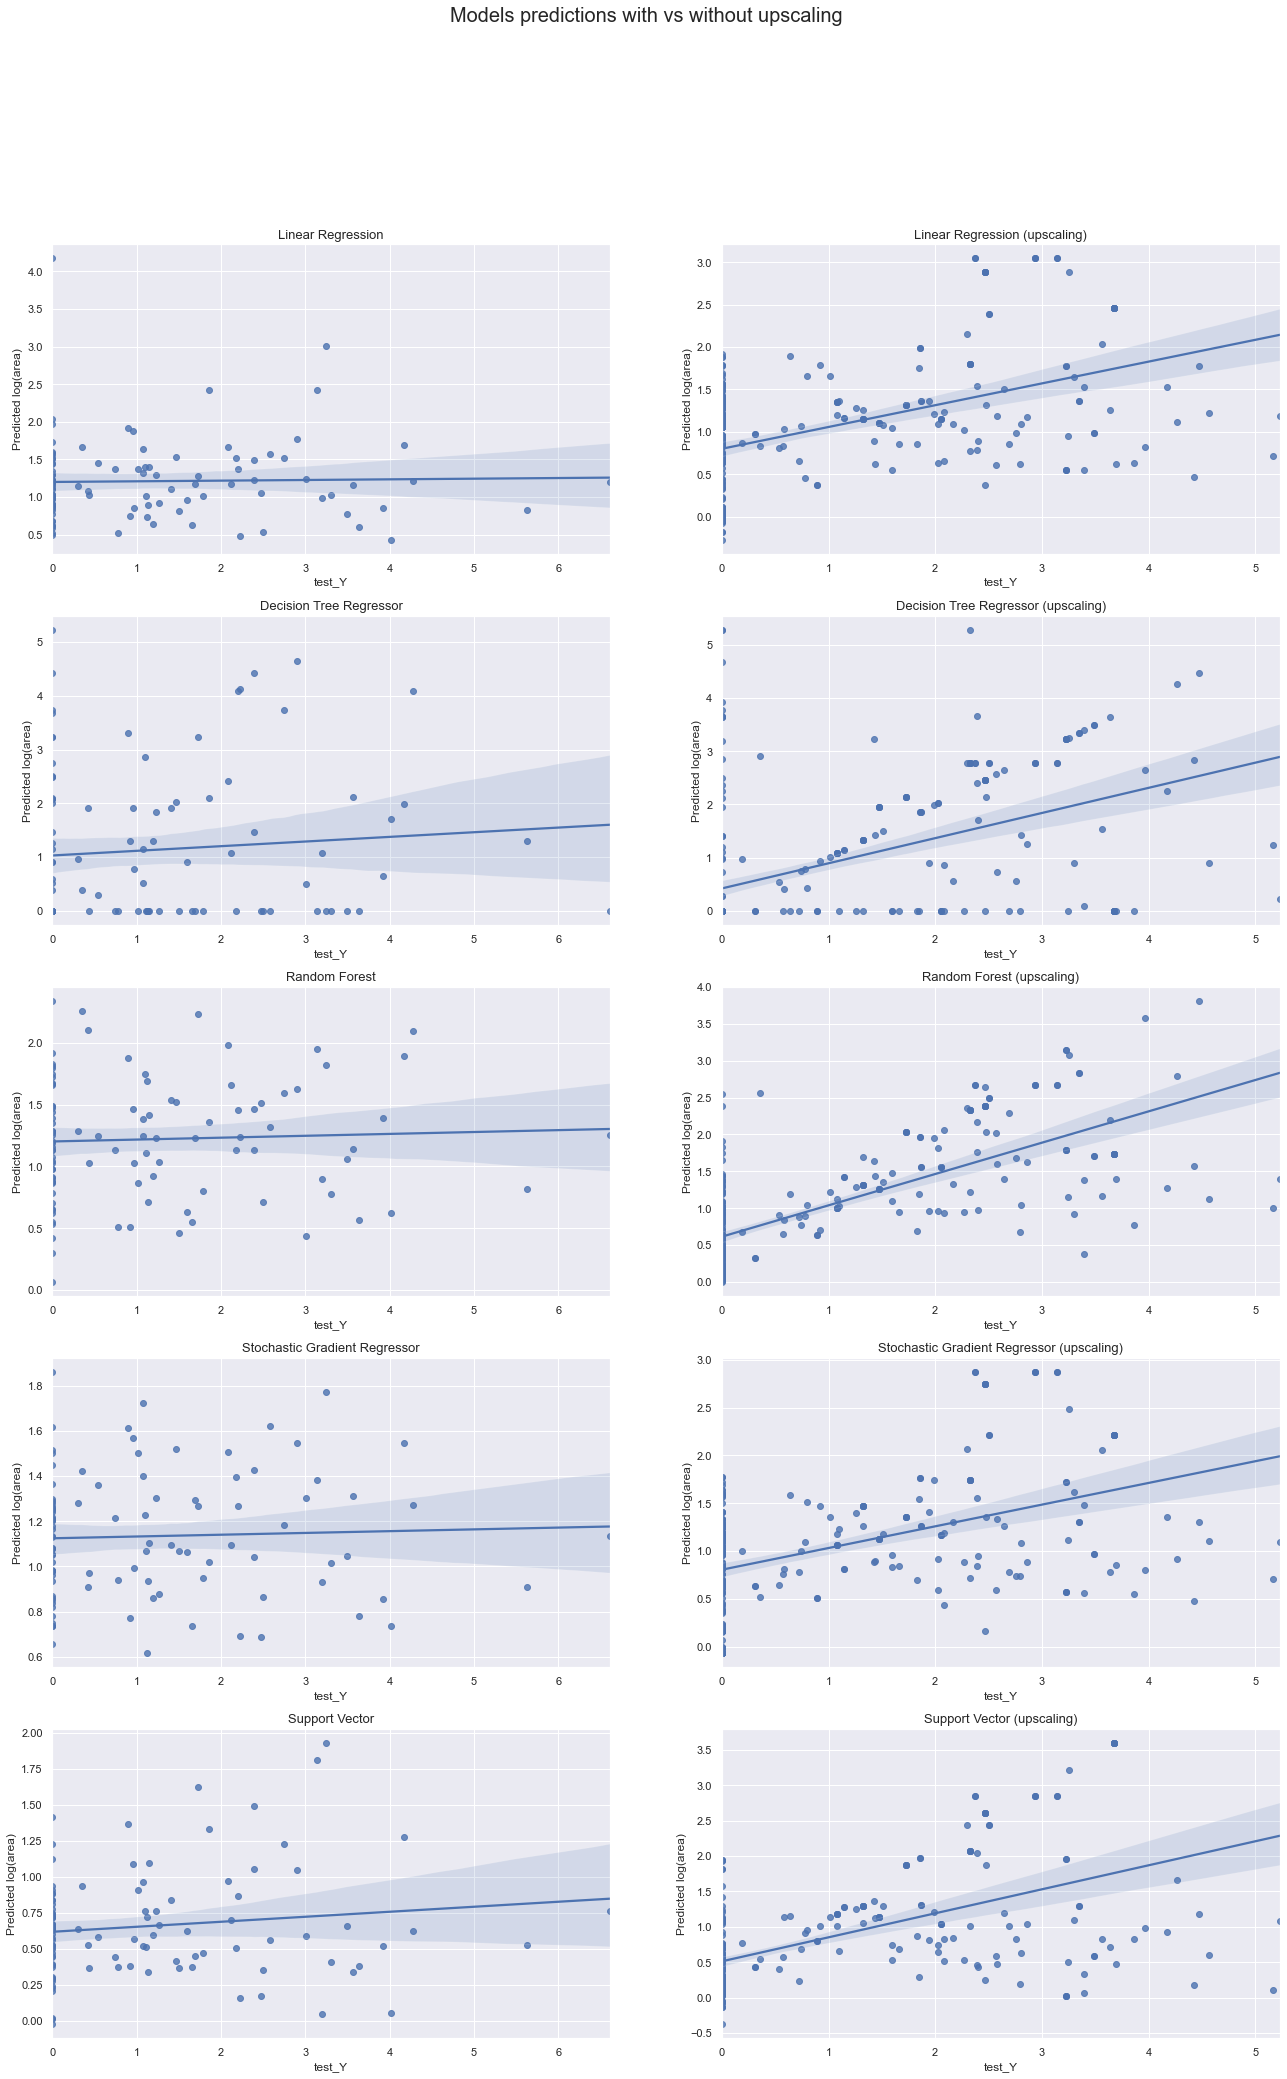

In [71]:
fig, [(ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8),(ax9, ax10)] = plt.subplots(5,2, figsize=(22, 33))
fig.suptitle("Models predictions with vs without upscaling", fontsize=20)
p1 = sns.regplot(x= 'test_Y',y='reg', data=plotting_no_up, ax=ax1)
p1.set_ylabel("Predicted log(area)")
p1.set_title("Linear Regression", fontsize=13)
p2 = sns.regplot(x= 'test_Y',y='reg', data=plotting_with_up, ax=ax2)
p2.set_ylabel("Predicted log(area)")
p2.set_title("Linear Regression (upscaling)", fontsize=13)
p3 = sns.regplot(x= 'test_Y',y='dec_tree', data=plotting_no_up, ax=ax3)
p3.set_ylabel("Predicted log(area)")
p3.set_title("Decision Tree Regressor", fontsize=13)
p4 = sns.regplot(x= 'test_Y',y='dec_tree', data=plotting_with_up, ax=ax4)
p4.set_ylabel("Predicted log(area)")
p4.set_title("Decision Tree Regressor (upscaling)", fontsize=13)
p5 = sns.regplot(x= 'test_Y',y='rfr', data=plotting_no_up, ax=ax5)
p5.set_ylabel("Predicted log(area)")
p5.set_title("Random Forest", fontsize=13)
p6 = sns.regplot(x= 'test_Y',y='rfr', data=plotting_with_up, ax=ax6)
p6.set_ylabel("Predicted log(area)")
p6.set_title("Random Forest (upscaling)", fontsize=13)
p7 = sns.regplot(x= 'test_Y',y='sgd', data=plotting_no_up, ax=ax7)
p7.set_ylabel("Predicted log(area)")
p7.set_title("Stochastic Gradient Regressor", fontsize=13)
p8 = sns.regplot(x= 'test_Y',y='sgd', data=plotting_with_up, ax=ax8)
p8.set_ylabel("Predicted log(area)")
p8.set_title("Stochastic Gradient Regressor (upscaling)", fontsize=13)
p9 = sns.regplot(x= 'test_Y',y='svr', data=plotting_no_up, ax=ax9)
p9.set_ylabel("Predicted log(area)")
p9.set_title("Support Vector", fontsize=13)
p10 = sns.regplot(x= 'test_Y',y='svr', data=plotting_with_up, ax=ax10)
p10.set_ylabel("Predicted log(area)")
p10.set_title("Support Vector (upscaling)", fontsize=13)

### Mean Square Error for all models

In [70]:
print("MSE for models without upscaling")
for x in ['reg', 'dec_tree', 'rfr', 'sgd', 'svr']:
    print(x+':', mean_squared_error(plotting_no_up['test_Y'], plotting_no_up[x]))
print('\n')  

print("MSE for models with upscaling")    
for x in ['reg', 'dec_tree', 'rfr', 'sgd', 'svr']:
    print(x+':', mean_squared_error(plotting_with_up['test_Y'], plotting_with_up[x]))  

MSE for models without upscaling
reg: 2.266361376717505
dec_tree: 3.6253476984948994
rfr: 2.1874098751579663
sgd: 2.0622579276373503
svr: 2.248159187027181


MSE for models with upscaling
reg: 1.4008190389946336
dec_tree: 1.7769662965263493
rfr: 0.9192514301193128
sgd: 1.412357137054533
svr: 1.2762746177023359


## Neural Regression with Relu and Tanh

In [165]:
from sklearn.neural_network import MLPRegressor
models = []

models.append(('reluNN', MLPRegressor(solver = 'sgd',activation = 'relu', hidden_layer_sizes=(5,10),
                   verbose = False, max_iter=9999, tol=1e-6, alpha = 0.00001)))
models.append(('tanhNN', MLPRegressor(solver = 'sgd',activation = 'tanh', hidden_layer_sizes=(5,10),
                   verbose = False, max_iter=9999, tol=1e-6, alpha = 0.00001)))

In [167]:
from sklearn.metrics import mean_absolute_error
meanError=[]
print('root mean squared error:')
for name, rgn in models:
    rgn.fit(fires_prepared,fires_labels)
    print(name)
    print(np.sqrt(mean_squared_error(rgn.predict(test_X_prepared), test_Y)))
    meanError.append((name, np.sqrt(mean_squared_error(rgn.predict(test_X_prepared), test_Y))))
meanError=np.array(meanError)

root mean squared error:
reluNN
0.9562405422052157
tanhNN
1.0781007741792776


In [ ]:
# cross validation
for name, rgn in models:
  print(name)
  temp = cross_val_score(rgn, fires_prepared, fires_labels, cv=50, scoring='neg_mean_absolute_error')
  print(np.average(abs(temp)))

Out of 517 instances of dataset, 217 are those in which burnt area is equal to zero. 
These zero entries are close to hald of entire dataset, which also has some influence on our regression models.
Here is the result of models when dataset only consist of area > 0

Text(0.5, 1.0, 'Support Vector Machine Regressor')

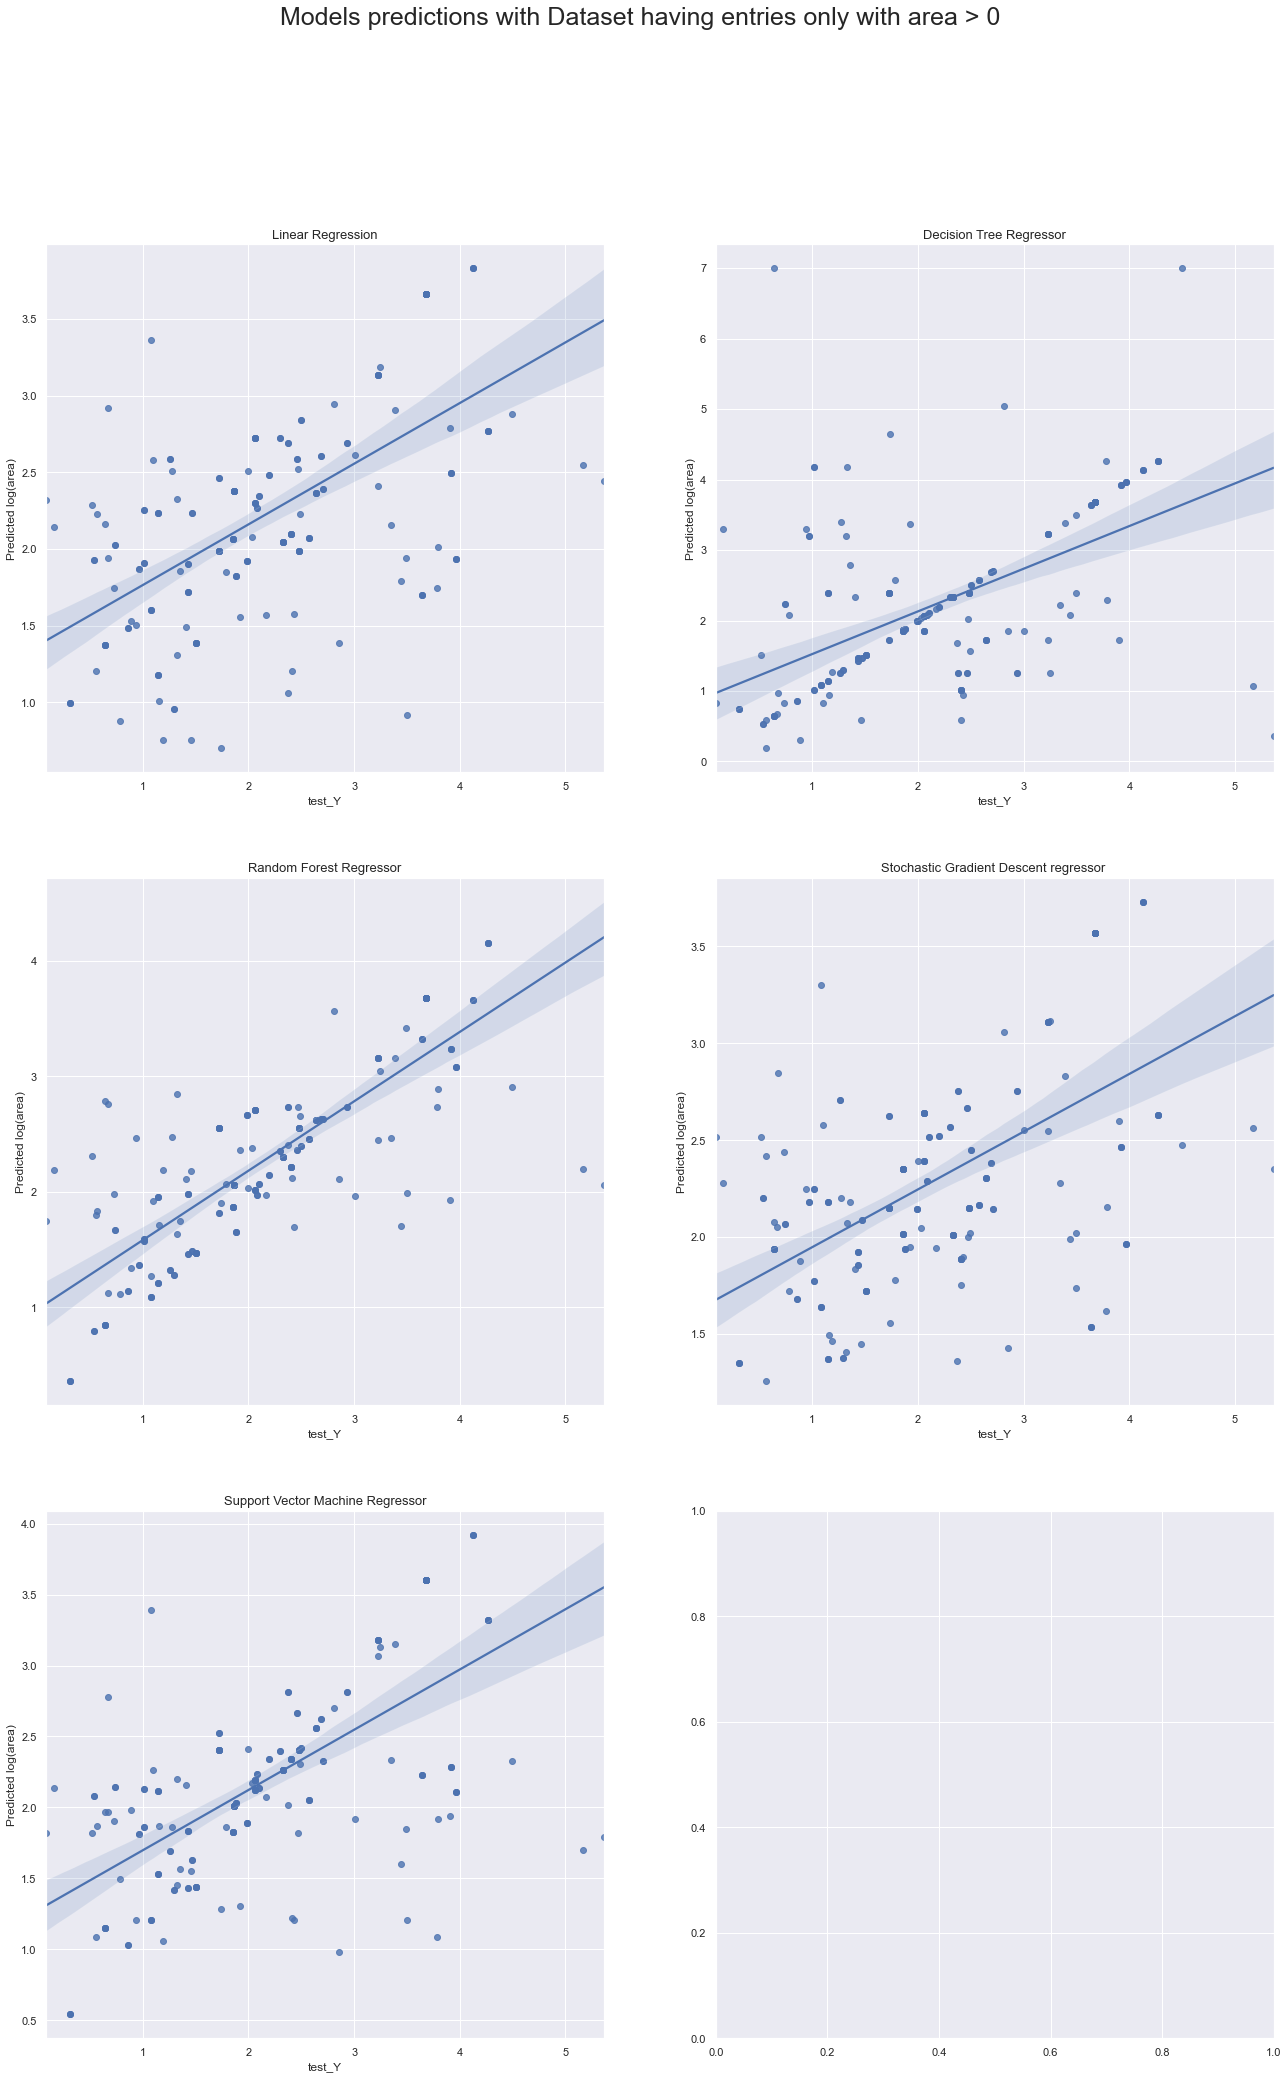

In [151]:
fig, [(ax1, ax2), (ax3, ax4),(ax5, ax6)] = plt.subplots(3,2, figsize=(22, 33))
fig.suptitle("Models predictions with Dataset having entries only with area > 0", fontsize=25)
p1 = sns.regplot(x= 'test_Y',y='reg', data=plotting_area_g_0, ax=ax1)
p1.set_ylabel("Predicted log(area)")
p1.set_title("Linear Regression", fontsize=13)
p2 = sns.regplot(x= 'test_Y',y='dec_tree', data=plotting_area_g_0, ax=ax2)
p2.set_ylabel("Predicted log(area)")
p2.set_title("Decision Tree Regressor", fontsize=13)
p3 = sns.regplot(x= 'test_Y',y='rfr', data=plotting_area_g_0, ax=ax3)
p3.set_ylabel("Predicted log(area)")
p3.set_title("Random Forest Regressor", fontsize=13)
p4 = sns.regplot(x= 'test_Y',y='sgd', data=plotting_area_g_0, ax=ax4)
p4.set_ylabel("Predicted log(area)")
p4.set_title("Stochastic Gradient Descent regressor ", fontsize=13)
p5 = sns.regplot(x= 'test_Y',y='svr', data=plotting_area_g_0, ax=ax5)
p5.set_ylabel("Predicted log(area)")
p5.set_title("Support Vector Machine Regressor", fontsize=13)  

In [150]:
for x in ['reg', 'dec_tree', 'rfr', 'sgd', 'svr']:
    print(x+':', np.sqrt(mean_squared_error(plotting_area_g_0['test_Y'], plotting_area_g_0[x])))

reg: 0.8765692821185747
dec_tree: 1.0537091735574236
rfr: 0.6577776091470672
sgd: 0.9213016509592119
svr: 0.8383583323031337


## Conclusion

- As in the month attribute sep and aug were very dominant. After upscaling data, the performance of all models was drastically improved.
- Almost half of data shows no fire. So, taking dataset only with area > 0 , it also improved performance of all models.
- Overall random forest regressor gives the most accurate results in all three different formations of data. And on second was Multi Layer Perceptron Regression.
- Best results were found when instances having area = 0  were dropped. But in this case, models cannot predict 0 burnt area successfully. As a solution of this we can include a classifier to predict whether area is 0 or not. If it is not zero then we can predict the area from a regressor. This is just my assumption, i am not sure whether it can work or not.